In [16]:
import numpy as np
from qiskit import QuantumCircuit

def qft(n):
    """
    Constructs the Quantum Fourier Transform (QFT) circuit for n qubits.

    Args:
        n (int): The number of qubits for the QFT circuit.

    Returns:
        qiskit.QuantumCircuit: The QFT circuit.
    """
    if n == 0:
        return QuantumCircuit(0)

    qc = QuantumCircuit(n)

    # Apply the QFT rotations
    for j in range(n):
        qc.h(j)  #apply the Hardamard to evry qubit at start
        for k in range(j + 1, n): # next unitl last qubit apply CP(theta,control-qubit,target-qubit)- control phase shift gate of 
            qc.cp(np.pi/2**(k-j), k, j)

    # Swap the qubits to reverse the order
    for i in range(n//2):
        qc.swap(i, n-i-1)

    qc.name = f"QFT({n})"
    return qc

# Example of creating and drawing a 3-qubit QFT circuit
n_qubits = 3
qft_circuit = qft(n_qubits)
print("QFT circuit for 3 qubits:")
print(qft_circuit)

QFT circuit for 3 qubits:
     ┌───┐                                        
q_0: ┤ H ├─■────────■───────────────────────────X─
     └───┘ │P(π/2)  │       ┌───┐               │ 
q_1: ──────■────────┼───────┤ H ├─■─────────────┼─
                    │P(π/4) └───┘ │P(π/2) ┌───┐ │ 
q_2: ───────────────■─────────────■───────┤ H ├─X─
                                          └───┘   


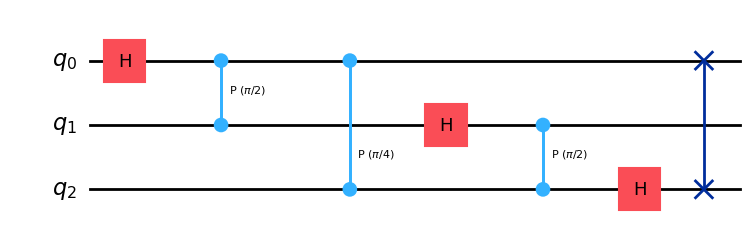

In [12]:
from qiskit.visualization import *
qft_circuit.draw('mpl')